In [1]:
import pandas as pd
from numpy import where

In [2]:
df = pd.read_parquet('dados_dengue.parquet')

In [3]:
df['SG_UF_NOT'].unique()

array(['27', '21', '23', '33', '26', '28', '29', '11', '32', '24', '17',
       '22', '31', '25', '13', '  ', '15', '16', '12', '14', '35', '43',
       '41', '42', '53', '51', '52', '50', 'MG', 'MS', 'MT', 'PA', 'PB',
       'CE', 'GO', 'MA', 'PI', 'DF', 'RJ', 'RN', 'RO', 'RR', 'RS', 'SC',
       'SE', 'SP', 'ES', 'TO', 'PE', 'PR', 'AC', 'AL', 'AM', 'AP', 'BA',
       '"s'], dtype=object)

In [4]:
df['SG_UF'].unique()

array(['27', '21', '23', '33', '26', '28', '29', '11', '32', '24', '17',
       '22', '31', '25', '13', '  ', '15', '16', '12', '14', '35', '53',
       '51', '43', '41', '42', '52', '50', 'MG', 'PR', 'MS', 'SC', 'MT',
       'RO', 'BA', 'MA', 'AC', 'GO', 'PA', 'TO', 'PI', 'AP', 'PE', 'RR',
       'RN', 'PB', 'CE', 'AM', 'DF', 'RJ', 'SP', 'RS', 'SE', 'ES', 'AL',
       'NG', '00', 'MH', 'F ', '2 ', '61', 'MF', '1 ', '07'], dtype=object)

In [5]:
codigos = pd.read_html('https://sistemasweb.agricultura.gov.br/manuais/Manual_PGA_WS/322CodigoIBGESigladaUnidadeFeder.html')

In [6]:
cod_uf = codigos[0]
cod_uf.columns = ['cod', 'uf']
cod_uf['cod'] = cod_uf['cod'].astype('object')

In [7]:
cod_uf.dtypes

cod    object
uf     object
dtype: object

In [8]:
df.dtypes

ID_MUNICIP            object
ID_UNIDADE            object
DT_NOTIFIC    datetime64[ns]
SG_UF_NOT             object
SG_UF                 object
dtype: object

In [9]:
df['SG_UF_NOT'].unique()

array(['27', '21', '23', '33', '26', '28', '29', '11', '32', '24', '17',
       '22', '31', '25', '13', '  ', '15', '16', '12', '14', '35', '43',
       '41', '42', '53', '51', '52', '50', 'MG', 'MS', 'MT', 'PA', 'PB',
       'CE', 'GO', 'MA', 'PI', 'DF', 'RJ', 'RN', 'RO', 'RR', 'RS', 'SC',
       'SE', 'SP', 'ES', 'TO', 'PE', 'PR', 'AC', 'AL', 'AM', 'AP', 'BA',
       '"s'], dtype=object)

In [10]:
cod_uf['cod'] = cod_uf['cod'].apply(lambda x: str(x)) 

In [11]:
cod_uf

,cod,uf
0,11,RO
1,12,AC
2,13,AM
3,14,RR
4,15,PA
5,16,AP
6,17,TO
7,21,MA
8,22,PI
9,23,CE


In [12]:
cod_uf_dict = meu_dict = dict(zip(cod_uf['cod'].values, cod_uf['uf'].values))

In [13]:
df['SG_UF'] = df['SG_UF'].apply(lambda x: cod_uf_dict.get(x, x))

In [14]:
df['SG_UF'].value_counts(ascending=True).head(12).index

Index(['07', 'MF', '61', '2 ', '00', 'F ', '1 ', 'NG', 'MH', '  ', 'AP', 'RR'], dtype='object')

In [15]:
df.query("SG_UF == '  ' ")

,ID_MUNICIP,ID_UNIDADE,DT_NOTIFIC,SG_UF_NOT,SG_UF
373,221100,2323281,2007-05-03,,
5982,140045,2476827,2007-05-02,14,
5984,140045,2476827,2007-06-18,14,
58315,411845,2779935,2007-06-11,41,
58729,410150,2576341,2007-05-04,41,
...,...,...,...,...,...
24448256,4108304,2673177,2006-04-26,PR,
24448487,4123501,4055853,2006-04-21,PR,
24448488,4123501,4055853,2006-05-02,PR,
24448576,4108304,2673177,2006-05-15,PR,


In [16]:
df['SG_UF_NOT'] = df['SG_UF_NOT'].apply(lambda x: cod_uf_dict.get(x, x))

In [17]:
df['SG_UF_NOT'].value_counts(ascending=True).head(12).index

Index(['"s', '  ', 'AP', 'RR', 'SE', 'RS', 'MA', 'RO', 'PI', 'AM', 'AC', 'TO'], dtype='object')

In [18]:
df.loc[df['SG_UF_NOT'] == '\"s', 'SG_UF_NOT'] = 'CE'

In [19]:
df['SG_UF_NOT'].value_counts(ascending=True).head(12).index

Index(['  ', 'AP', 'RR', 'SE', 'RS', 'MA', 'RO', 'PI', 'AM', 'AC', 'TO', 'SC'], dtype='object')

In [20]:
df.loc[df['SG_UF_NOT'] == '  ', 'SG_UF_NOT'] = df.loc[df['SG_UF_NOT'] == '  ', 'SG_UF']

In [21]:
df['SG_UF_NOT'].value_counts(ascending=True).head(12)

07        1
MF        1
61        1
2         1
00        1
F         1
1         1
NG        2
MH        3
         14
AP    63955
RR    94051
Name: SG_UF_NOT, dtype: int64

In [22]:
df['SG_UF_NOT'].value_counts(ascending=True).head(12).index

Index(['07', 'MF', '61', '2 ', '00', 'F ', '1 ', 'NG', 'MH', '  ', 'AP', 'RR'], dtype='object')

In [23]:


UFs_to_delete = ['07', 'MF', '61', '2 ', '00', 'F ', '1 ', 'NG', 'MH', '  ']
df = df[~df['SG_UF_NOT'].isin(UFs_to_delete)]

In [24]:
df['SG_UF_NOT'].unique()

array(['AL', 'MA', 'CE', 'RJ', 'PE', 'SE', 'BA', 'RO', 'ES', 'RN', 'TO',
       'PI', 'MG', 'PB', 'AM', 'PA', 'AP', 'AC', 'RR', 'SP', 'RS', 'PR',
       'SC', 'DF', 'MT', 'GO', 'MS'], dtype=object)

In [25]:
result = df.groupby(['SG_UF_NOT', 'ID_MUNICIP', 'DT_NOTIFIC'])['DT_NOTIFIC'].count()

In [26]:
df_series = pd.DataFrame(result)
df_series.columns = ['Notificações']

In [27]:
df_series = df_series.reset_index()

In [28]:
df_series

,SG_UF_NOT,ID_MUNICIP,DT_NOTIFIC,Notificações
0,AC,120001,2007-01-10,1
1,AC,120001,2007-02-06,1
2,AC,120001,2007-02-26,1
3,AC,120001,2007-02-28,3
4,AC,120001,2007-03-13,1
...,...,...,...,...
3854338,TO,354990,2016-03-11,1
3854339,TO,354990,2016-03-14,1
3854340,TO,410830,2016-03-06,1
3854341,TO,410830,2016-03-14,1


In [29]:
df_series['DT_NOTIFIC'].min()

Timestamp('2000-01-01 00:00:00')

In [30]:
df_series['DT_NOTIFIC'].max()

Timestamp('2023-12-30 00:00:00')

In [31]:
df_pivot = df_series.pivot_table(values = 'Notificações', index = 'DT_NOTIFIC', columns=['SG_UF_NOT', 'ID_MUNICIP'])

In [32]:
df_month_pivot = df_pivot.resample('M').sum().reset_index()#melt(var_name=['SG_UF_NOT', 'ID_MUNICIP'], id_vars=['DT_NOTIFIC'], value_name='Notificações')

In [33]:
df_month_pivot

SG_UF_NOT  DT_NOTIFIC     AC                                               \
ID_MUNICIP            120001 1200013 120005 1200054 120010 1200104 120013   
0          2000-01-31    0.0     0.0    0.0     0.0    0.0     0.0    0.0   
1          2000-02-29    0.0     0.0    0.0     0.0    0.0     1.0    0.0   
2          2000-03-31    0.0     0.0    0.0     0.0    0.0     0.0    0.0   
3          2000-04-30    0.0     0.0    0.0     0.0    0.0     1.0    0.0   
4          2000-05-31    0.0     0.0    0.0     0.0    0.0     0.0    0.0   
..                ...    ...     ...    ...     ...    ...     ...    ...   
283        2023-08-31    0.0     0.0    4.0     0.0   22.0     0.0    0.0   
284        2023-09-30    0.0     0.0    4.0     0.0   14.0     0.0    0.0   
285        2023-10-31    2.0     0.0    1.0     0.0   22.0     0.0    2.0   
286        2023-11-30    4.0     0.0    7.0     0.0   54.0     0.0    3.0   
287        2023-12-31   15.0     0.0   69.0     0.0  476.0     0.0   47.0   

SG_UF_NOT                  ...      TO                                     \
ID_MUNICIP 1200138 120017  ... 1722107 210160 230660 230900 241040 312400   
0              0.0    0.0  ...     0.0    0.0    0.0    0.0    0.0    0.0   
1              0.0    0.0  ...     1.0    0.0    0.0    0.0    0.0    0.0   
2              0.0    0.0  ...     5.0    0.0    0.0    0.0    0.0    0.0   
3              0.0    0.0  ...     3.0    0.0    0.0    0.0    0.0    0.0   
4              0.0    0.0  ...     1.0    0.0    0.0    0.0    0.0    0.0   
..             ...    ...  ...     ...    ...    ...    ...    ...    ...   
283            0.0    0.0  ...     0.0    0.0    0.0    0.0    0.0    0.0   
284            0.0    1.0  ...     0.0    0.0    0.0    0.0    0.0    0.0   
285            0.0    0.0  ...     0.0    0.0    0.0    0.0    0.0    0.0   
286            0.0   91.0  ...     0.0    0.0    0.0    0.0    0.0    0.0   
287            0.0  135.0  ...     0.0    0.0    0.0    0.0    0.0    0.0   

SG_UF_NOT                                
ID_MUNICIP 354220 354990 410830 5208707  
0             0.0    0.0    0.0     0.0  
1             0.0    0.0    0.0     0.0  
2             0.0    0.0    0.0     0.0  
3             0.0    0.0    0.0     0.0  
4             0.0    0.0    0.0     0.0  
..            ...    ...    ...     ...  
283           0.0    0.0    0.0     0.0  
284           0.0    0.0    0.0     0.0  
285           0.0    0.0    0.0     0.0  
286           0.0    0.0    0.0     0.0  
287           0.0    0.0    0.0     0.0  

[288 rows x 10595 columns]

In [34]:
df_month = pd.melt(df_month_pivot, id_vars='DT_NOTIFIC',  var_name=['SG_UF_NOT', 'ID_MUNICIP'], value_name='Notificações')

In [35]:
df_month

,DT_NOTIFIC,SG_UF_NOT,ID_MUNICIP,Notificações
0,2000-01-31,AC,120001,0.0
1,2000-02-29,AC,120001,0.0
2,2000-03-31,AC,120001,0.0
3,2000-04-30,AC,120001,0.0
4,2000-05-31,AC,120001,0.0
...,...,...,...,...
3051067,2023-08-31,TO,5208707,0.0
3051068,2023-09-30,TO,5208707,0.0
3051069,2023-10-31,TO,5208707,0.0
3051070,2023-11-30,TO,5208707,0.0


<Axes: xlabel='DT_NOTIFIC'>

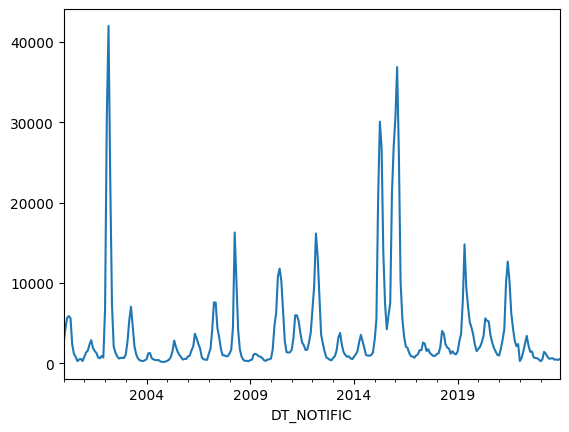

In [36]:
import matplotlib.pyplot as plt
df_month.query("SG_UF_NOT == 'PE' ").groupby('DT_NOTIFIC')['Notificações'].sum().plot()

In [37]:
df_month.to_parquet('casos_mensal_br.parquet'  , compression='gzip')

In [43]:
df_month.sample(10)

,DT_NOTIFIC,SG_UF_NOT,ID_MUNICIP,Notificações
346475,2000-12-31,BA,293250,0.0
2006285,2006-06-30,PR,412555,0.0
1502301,2007-10-31,PB,250810,0.0
1175475,2012-04-30,MG,316430,0.0
2306298,2023-07-31,RS,431053,0.0
1172555,2008-12-31,MG,316370,1.0
934684,2010-05-31,MG,312590,1.0
2186443,2019-08-31,RN,410830,0.0
1745692,2010-05-31,PI,220540,1.0
2771895,2015-04-30,SP,3527108,0.0


In [40]:
df_month['ID_MUNICIP'].nunique()

10314

In [41]:
df_month['SG_UF_NOT'].nunique()

27